# Random quadratic programming.

Here, we are going to try to simulate the Macarthur Resource Consumer dynamics, specifically

$$
\begin{align}
\frac{d \lambda_i}{dt} &= \lambda_i (\sum_{\alpha} c_{i,\alpha} R_{\alpha} - m_i) \\
\frac{d R_{\alpha}}{dt} &= R_{\alpha} (K_{\alpha} - R_{\alpha} - \sum_j \lambda_j c_{j, \alpha} R_{\alpha})
\end{align}
$$

There are 3 different parameters that we will want to simulation, namely $c$, $m$ and $K$

We will also want to randomly generate the initial conditions of all of the species and resources.  
The lognormal distribution will be our default generating distribution.

In [1]:
import numpy as np
from cvxopt import matrix
from cvxopt import solvers

n_species = 10
n_resources = 20

c = np.random.lognormal(size=(n_species, n_resources))
K = np.random.lognormal(size=(n_resources))
m = np.random.lognormal(size=(n_species))
N0 = np.random.lognormal(size=(n_species))
R0 = np.random.lognormal(size=(n_resources))

In [2]:
# Define QP parameters (directly)
M = np.identity(n_resources)
P = np.dot(M.T, M)
q = -np.dot(K, M).reshape((n_resources,))
G1= c
h1= m

G2 = -np.identity(n_resources)
h2 = np.zeros(n_resources)
G=np.concatenate((G1, G2), axis=0)
h=np.concatenate((h1, h2), axis=None)

In [3]:
P = matrix(P,tc="d")
q = matrix(q, tc="d")
G = matrix(G, tc="d")
h = matrix(h, tc="d")

solvers.options['show_progress'] = False
solvers.options['abstol']=1e-8
solvers.options['reltol']=1e-8
solvers.options['feastol']=1e-8
solvers.options['DSDP_Monitor'] = 1
sol = solvers.qp(P,q,G,h)

In [4]:
import matplotlib.pyplot as plt
plt.plot(sorted(np.array(sol['x']).ravel())[::-1])
plt.yscale('log')

In [5]:
sol

{'x': <20x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <30x1 matrix, tc='d'>,
 'z': <30x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 5.577389553453941e-10,
 'relative gap': 2.456580927476236e-10,
 'primal objective': -2.2703870615749926,
 'dual objective': -2.270387062132731,
 'primal infeasibility': 2.2104876794910166e-16,
 'dual infeasibility': 4.606199279993975e-15,
 'primal slack': 7.867901897443907e-13,
 'dual slack': 3.8906447270946115e-12,
 'iterations': 10}

In [8]:
num_samples = 100

microbes = []
resources = []

for s in range(num_samples):
    N0 = np.random.lognormal(size=(n_species))
    R0 = np.random.lognormal(size=(n_resources))
    c = np.random.lognormal(size=(n_species, n_resources))
    K = np.random.lognormal(size=(n_resources))
    m = np.random.lognormal(size=(n_species))
    
    # Define QP parameters (directly)
    M = np.identity(n_resources)
    P = np.dot(M.T, M)
    q = -np.dot(K, M).reshape((n_resources,))
    G1= c
    h1= m

    G2 = -np.identity(n_resources)
    h2 = np.zeros(n_resources)
    G=np.concatenate((G1, G2), axis=0)
    h=np.concatenate((h1, h2), axis=None)   
    
    P = matrix(P,tc="d")
    q = matrix(q, tc="d")
    G = matrix(G, tc="d")
    h = matrix(h, tc="d")    
    sol = solvers.qp(P,q,G,h)
    resources.append(np.ravel(sol['x']))
    microbes.append(np.ravel(sol['z'])[:n_species])

In [11]:
microbes = np.vstack(microbes)
resources = np.vstack(resources)

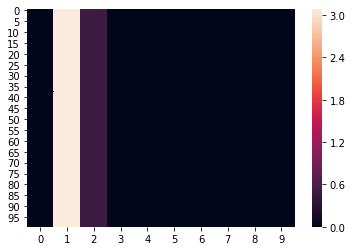

In [14]:
import seaborn as sns
sns.heatmap(microbes)